In [1]:
# Numerical library
import numpy as np

# Data manipulation
import pandas as pd
#from patsy import dmatrix

# Ploting
import matplotlib.pyplot as plt
import matplotlib
# Survival analysis
import lifelines

from IPython.display import *



In [14]:
%matplotlib inline

In [26]:
clinical = pd.read_csv('female_sum_sur.csv')



In [28]:
clinical.head()

,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,3,alive,16,female,1.606578,-0.510644,-0.025465,0.673865,0.483875,0.035045,...,-0.144193,-0.593407,-0.127144,-0.655712,-0.600644,-0.289525,-0.241978,-0.159964,0.704926,-0.501384
1,4,alive,1005,female,0.244557,-0.134814,1.023669,-0.261402,0.786575,-0.808833,...,-0.144193,1.926751,-0.127144,0.635404,0.383696,-0.289525,-0.241978,-0.159964,-0.345912,-0.501384
2,6,dead,1162,female,-1.184302,-0.352707,-1.665393,-1.977437,-1.227322,0.685510,...,-0.144193,-0.593407,-0.127144,-0.680905,0.527238,-0.289525,-0.241978,-0.159964,-0.757943,-0.501384
3,23,alive,726,female,-0.148929,0.995843,0.061240,-0.222916,0.211855,0.597236,...,-0.144193,-0.475989,-0.127144,-0.113303,-0.085430,-0.289525,-0.241978,0.005554,0.499179,-0.063350
4,24,alive,1199,female,-0.966674,-0.382521,-0.492556,0.228280,0.214070,-0.108851,...,-0.144193,1.021143,-0.127144,0.348022,-0.380861,-0.289525,-0.241978,0.124530,0.528082,-0.501384


In [29]:
clinical['status'] = (clinical['status'] == 'dead')*1

In [30]:
from lifelines import KaplanMeierFitter

In [31]:
kmf=KaplanMeierFitter()
kmf.fit(clinical['survival_days'], clinical['status'])

<lifelines.KaplanMeierFitter: fitted with 296 observations, 227 censored>

Populating the interactive namespace from numpy and matplotlib


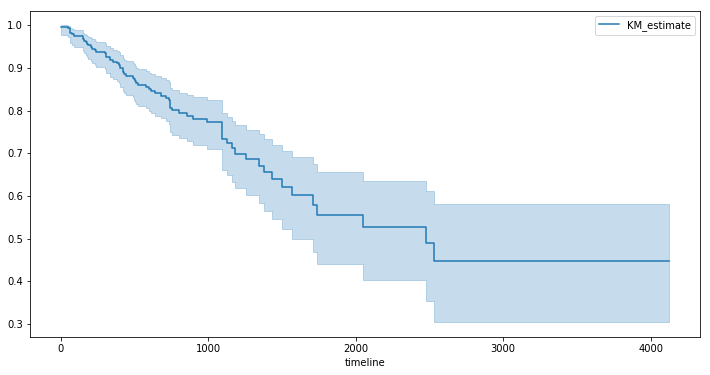

In [32]:
%pylab inline
figsize(12,6)
kmf.plot()

In [33]:
data = clinical
data.head()


,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,3,0,16,female,1.606578,-0.510644,-0.025465,0.673865,0.483875,0.035045,...,-0.144193,-0.593407,-0.127144,-0.655712,-0.600644,-0.289525,-0.241978,-0.159964,0.704926,-0.501384
1,4,0,1005,female,0.244557,-0.134814,1.023669,-0.261402,0.786575,-0.808833,...,-0.144193,1.926751,-0.127144,0.635404,0.383696,-0.289525,-0.241978,-0.159964,-0.345912,-0.501384
2,6,1,1162,female,-1.184302,-0.352707,-1.665393,-1.977437,-1.227322,0.685510,...,-0.144193,-0.593407,-0.127144,-0.680905,0.527238,-0.289525,-0.241978,-0.159964,-0.757943,-0.501384
3,23,0,726,female,-0.148929,0.995843,0.061240,-0.222916,0.211855,0.597236,...,-0.144193,-0.475989,-0.127144,-0.113303,-0.085430,-0.289525,-0.241978,0.005554,0.499179,-0.063350
4,24,0,1199,female,-0.966674,-0.382521,-0.492556,0.228280,0.214070,-0.108851,...,-0.144193,1.021143,-0.127144,0.348022,-0.380861,-0.289525,-0.241978,0.124530,0.528082,-0.501384


,test_statistic,p
0,0.005697,0.939832


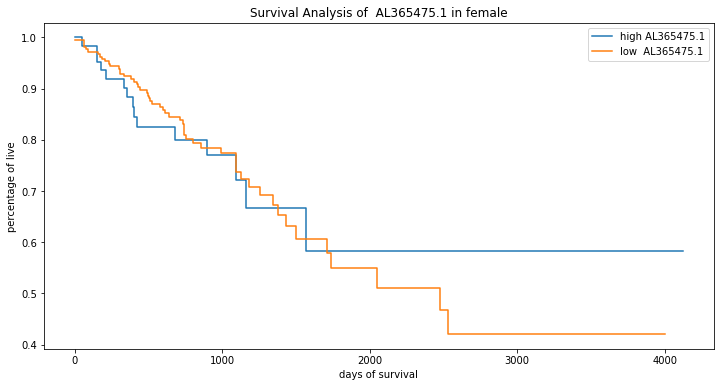

In [34]:


### Define groups here
treshold =0

group_1 = data.loc[data['ENSG00000261208'] > treshold]
group_2 = data.loc[data['ENSG00000261208'] <= treshold]
###
###

kmf.fit(group_1['survival_days'], group_1['status'], label='high AL365475.1')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['survival_days'], group_2['status'], label='low  AL365475.1')
kmf.plot(ax=ax, ci_show=False)

plt.title('Survival Analysis of  AL365475.1 in female')
plt.xlabel('days of survival')
plt.ylabel('percentage of live')

from lifelines.statistics import logrank_test

test = logrank_test(group_1['survival_days'], group_2['survival_days'], event_observed_A=group_1['status'], event_observed_B=group_2['status'])
test.summary